In [2]:
import ipywidgets as widgets
from IPython.display import display
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pandas as pd
import geopandas as gpd
import contextily as ctx
import shap
import matplotlib.pyplot as plt
import numpy as np

In [3]:
#only change the model name here
model = "transformer"
shap_path = "/Users/I566184/bachelorarbeit_coding/mesogeos/csv/shap_map_csv"
test_path = "/Users/I566184/bachelorarbeit_coding/mesogeos/csv/test_softmax_csv"
shape_file = f"shap_map_{model}.csv"
test_file = f"test_softmax_outputs_{model}.csv"
df1 = pd.read_csv(f"{shap_path}/{shape_file}")
df2 = pd.read_csv(f"{test_path}/{test_file}")

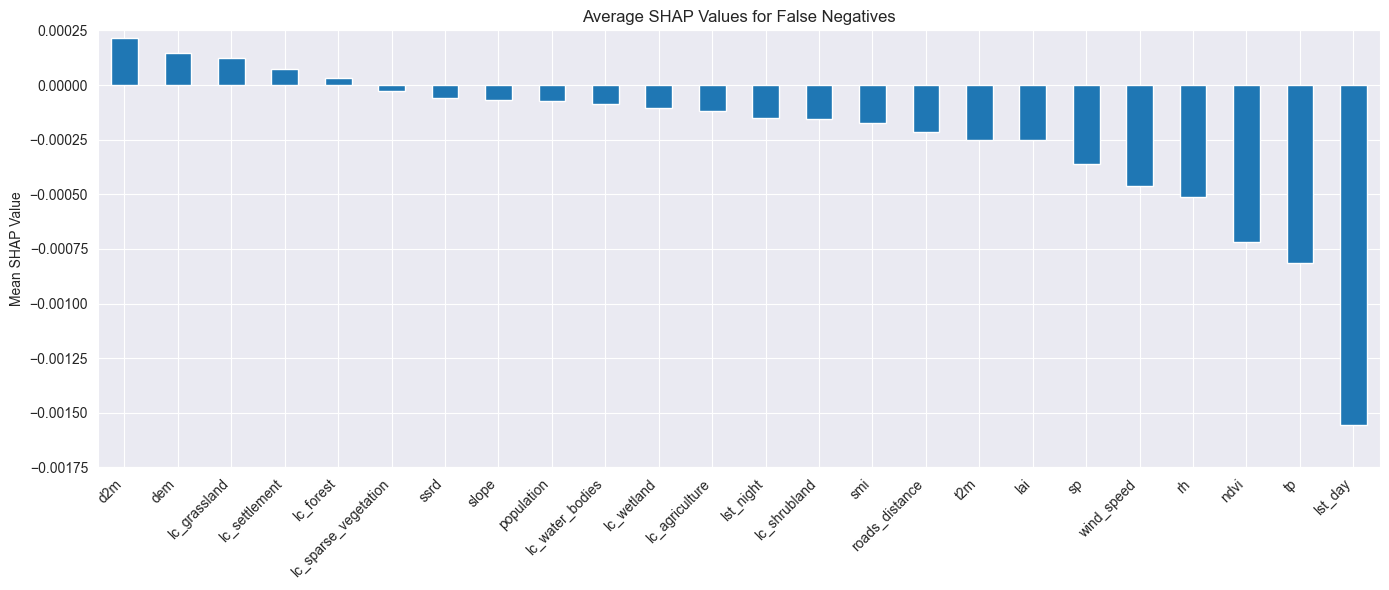

In [26]:
# Plotting False Negatives
prob_threshold = 0.25
vmin=-0.00175
vmax=0.00025

merged_df = df1.merge(df2, left_on=['sample', 'label', 'x', 'y'], right_on=['sample_id', 'label', 'lat', 'lon'], how='inner')
merged_df = merged_df[(merged_df["label"] == 1) & (merged_df["prob"] < prob_threshold)]
mean_values = merged_df.mean(numeric_only=True).to_frame().T
df_fn = pd.concat([merged_df, mean_values], ignore_index=True).drop(columns=['sample_id', 'lat', 'lon'])
df_fn['sample'] = df_fn['sample'].astype(str)
df_fn.loc[df_fn.index[-1], 'sample'] = 'mean'

mean_row = df_fn[df_fn['sample'] == 'mean'].drop(columns=['sample', 'x', 'y', 'label', 'log_burned_area', 'prob']).iloc[0]

mean_row_sorted = mean_row.reindex(mean_row.sort_values(ascending=False).index)

plt.figure(figsize=(14, 6))
mean_row_sorted.plot(kind='bar')
plt.ylim(vmin, vmax)
plt.ylabel("Mean SHAP Value")
plt.title("Average SHAP Values for False Negatives")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

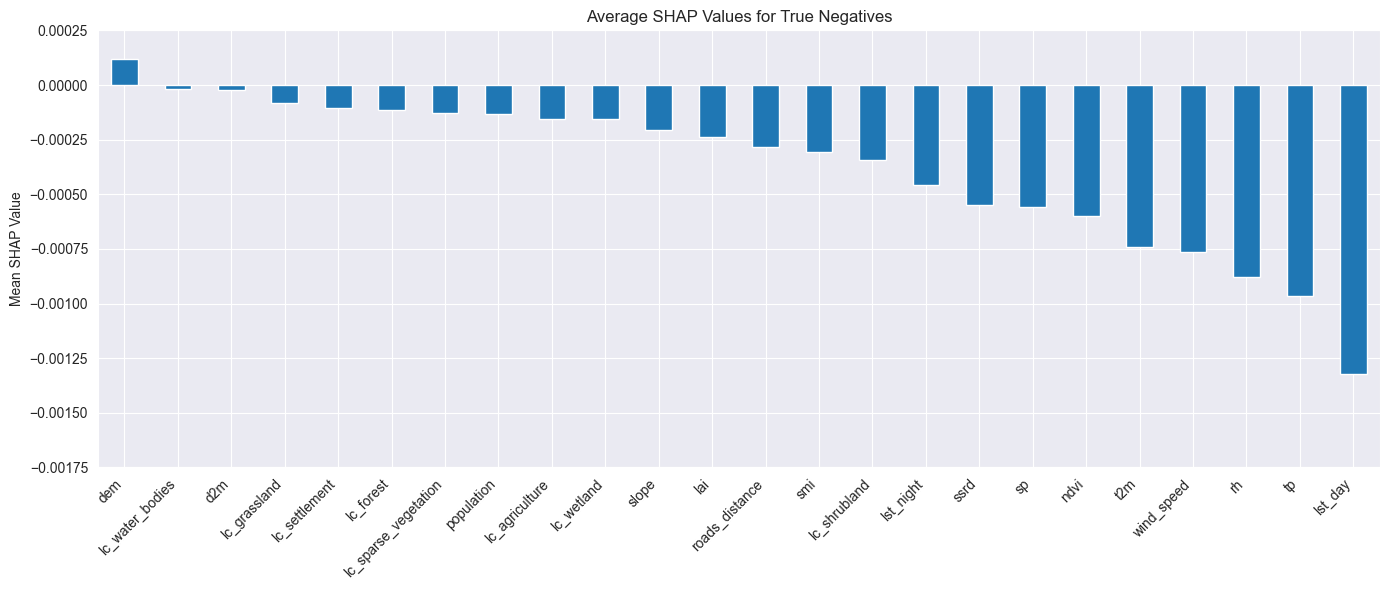

In [27]:
# Plotting True Negatives
prob_threshold = 0.25
vmin=-0.00175
vmax=0.00025

merged_df = df1.merge(df2, left_on=['sample', 'label', 'x', 'y'], right_on=['sample_id', 'label', 'lat', 'lon'], how='inner')
merged_df = merged_df[(merged_df["label"] == 0) & (merged_df["prob"] < prob_threshold)]
mean_values = merged_df.mean(numeric_only=True).to_frame().T
df_fn = pd.concat([merged_df, mean_values], ignore_index=True).drop(columns=['sample_id', 'lat', 'lon'])
df_fn['sample'] = df_fn['sample'].astype(str)
df_fn.loc[df_fn.index[-1], 'sample'] = 'mean'
df_fn
mean_row = df_fn[df_fn['sample'] == 'mean'].drop(columns=['sample', 'x', 'y', 'label', 'log_burned_area', 'prob']).iloc[0]

mean_row_sorted = mean_row.reindex(mean_row.sort_values(ascending=False).index)

plt.figure(figsize=(14, 6))
mean_row_sorted.plot(kind='bar')
plt.ylim(vmin, vmax)
plt.ylabel("Mean SHAP Value")
plt.title("Average SHAP Values for True Negatives")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()